In [1]:
#Stage 1 : Irfan data profiling using df_vax_demog_age
#update 7/12/2022

In [2]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import os, sys

In [3]:
#importing vaccination data  using demog-age data and review raw data
df_vax_demog_age =pd.read_csv ("https://raw.githubusercontent.com/mdirfan76/covid19-public/main/vaccination/vax_demog_age.csv")
#fork from github from 9122022


In [4]:
df1=df_vax_demog_age

In [5]:
# STEP 1 : REVIEW RAW DATA 
df1

,date,state,district,partial_5_11,full_5_11,booster_5_11,booster2_5_11,partial_12_17,full_12_17,booster_12_17,...,booster_70_79,booster2_70_79,partial_80,full_80,booster_80,booster2_80,partial_missing,full_missing,booster_missing,booster2_missing
0,2021-02-24,Johor,Batu Pahat,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Johor,Johor Bahru,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Johor,Kluang,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Johor,Kota Tinggi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Johor,Kulai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,2022-12-01,Terengganu,Marang,0,0,0,0,0,0,0,...,0,0,0,0,0,0,42,0,0,0
102064,2022-12-01,Terengganu,Setiu,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102065,2022-12-01,W.P. Kuala Lumpur,Kuala Lumpur,5,7,0,0,0,1,4,...,1,7,1,0,0,0,30,4,9,13
102066,2022-12-01,W.P. Labuan,Labuan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#STEP 2 : TO REVIEW DIMENSIONS OF OUR DATASET
df1.shape

(102068, 43)

In [6]:
# STEP 3 : REVIEW DATA ATTRIBUTES IN OUR DATA
df1.info()
# TO IDENTIFY DATA TYPE, PLAN TO CHANGE DATE TO DATETIME FORMAT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              102068 non-null  object
 1   state             102068 non-null  object
 2   district          102068 non-null  object
 3   partial_5_11      102068 non-null  int64 
 4   full_5_11         102068 non-null  int64 
 5   booster_5_11      102068 non-null  int64 
 6   booster2_5_11     102068 non-null  int64 
 7   partial_12_17     102068 non-null  int64 
 8   full_12_17        102068 non-null  int64 
 9   booster_12_17     102068 non-null  int64 
 10  booster2_12_17    102068 non-null  int64 
 11  partial_18_29     102068 non-null  int64 
 12  full_18_29        102068 non-null  int64 
 13  booster_18_29     102068 non-null  int64 
 14  booster2_18_29    102068 non-null  int64 
 15  partial_30_39     102068 non-null  int64 
 16  full_30_39        102068 non-null  int

In [7]:
# STEP 5 SUMMARIZE DATA USING DESCRIPTIVE STATISTICS
df1.describe()

,partial_5_11,full_5_11,booster_5_11,booster2_5_11,partial_12_17,full_12_17,booster_12_17,booster2_12_17,partial_18_29,full_18_29,...,booster_70_79,booster2_70_79,partial_80,full_80,booster_80,booster2_80,partial_missing,full_missing,booster_missing,booster2_missing
count,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,...,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000
mean,17.372467,15.083150,0.017322,0.000029,28.724782,27.995650,0.472606,0.003400,66.388496,65.789924,...,7.215758,0.633597,3.161216,3.123036,2.162656,0.200268,8.873094,7.891876,5.900988,0.152467
std,144.991502,113.721903,0.542341,0.006999,246.402198,242.661503,2.857840,0.067701,487.305167,471.756601,...,62.036300,6.448374,25.114769,24.232581,22.884938,2.108139,59.943262,56.995423,45.485107,1.865802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,10252.000000,5730.000000,58.000000,2.000000,11436.000000,10509.000000,228.000000,3.000000,23955.000000,23561.000000,...,5035.000000,486.000000,1603.000000,1551.000000,2925.000000,133.000000,3401.000000,3227.000000,2886.000000,170.000000


In [8]:
#to check missing value
df1.isnull().sum()
df1.isna().sum()

date                0
state               0
district            0
partial_5_11        0
full_5_11           0
booster_5_11        0
booster2_5_11       0
partial_12_17       0
full_12_17          0
booster_12_17       0
booster2_12_17      0
partial_18_29       0
full_18_29          0
booster_18_29       0
booster2_18_29      0
partial_30_39       0
full_30_39          0
booster_30_39       0
booster2_30_39      0
partial_40_49       0
full_40_49          0
booster_40_49       0
booster2_40_49      0
partial_50_59       0
full_50_59          0
booster_50_59       0
booster2_50_59      0
partial_60_69       0
full_60_69          0
booster_60_69       0
booster2_60_69      0
partial_70_79       0
full_70_79          0
booster_70_79       0
booster2_70_79      0
partial_80          0
full_80             0
booster_80          0
booster2_80         0
partial_missing     0
full_missing        0
booster_missing     0
booster2_missing    0
dtype: int64

In [9]:
# check duplicate based on all columns
df1.duplicated().sum()

0

In [9]:
#Stage 2 : Transform date to datetime series 
#update 7/12/2022

In [8]:
# to change date to datetime format
df1['date']=pd.to_datetime(df1['date'], yearfirst=True)

In [12]:
df1.info()
# we identify that date already change to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              102068 non-null  datetime64[ns]
 1   state             102068 non-null  object        
 2   district          102068 non-null  object        
 3   partial_5_11      102068 non-null  int64         
 4   full_5_11         102068 non-null  int64         
 5   booster_5_11      102068 non-null  int64         
 6   booster2_5_11     102068 non-null  int64         
 7   partial_12_17     102068 non-null  int64         
 8   full_12_17        102068 non-null  int64         
 9   booster_12_17     102068 non-null  int64         
 10  booster2_12_17    102068 non-null  int64         
 11  partial_18_29     102068 non-null  int64         
 12  full_18_29        102068 non-null  int64         
 13  booster_18_29     102068 non-null  int64         
 14  boos

In [5]:
df2 = df1[["date",'state','full_5_11','booster_5_11','full_12_17','booster_12_17','full_60_69','booster_60_69','full_70_79','booster_70_79','full_80','booster_80']]

In [6]:
df2

,date,state,full_5_11,booster_5_11,full_12_17,booster_12_17,full_60_69,booster_60_69,full_70_79,booster_70_79,full_80,booster_80
0,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102063,2022-12-01,Terengganu,0,0,0,0,0,0,0,0,0,0
102064,2022-12-01,Terengganu,0,0,0,0,0,0,0,0,0,0
102065,2022-12-01,W.P. Kuala Lumpur,7,0,1,4,0,1,0,1,0,0
102066,2022-12-01,W.P. Labuan,0,0,0,0,0,0,0,0,0,0


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           102068 non-null  datetime64[ns]
 1   state          102068 non-null  object        
 2   full_5_11      102068 non-null  int64         
 3   booster_5_11   102068 non-null  int64         
 4   full_12_17     102068 non-null  int64         
 5   booster_12_17  102068 non-null  int64         
 6   full_60_69     102068 non-null  int64         
 7   booster_60_69  102068 non-null  int64         
 8   full_70_79     102068 non-null  int64         
 9   booster_70_79  102068 non-null  int64         
 10  full_80        102068 non-null  int64         
 11  booster_80     102068 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.3+ MB


In [16]:
# to check number of state and its occurance
df2["state"].value_counts(ascending=True)

Perlis                 646
W.P. Kuala Lumpur      646
W.P. Labuan            646
W.P. Putrajaya         646
Melaka                1938
Pulau Pinang          3230
Negeri Sembilan       4522
Terengganu            5168
Selangor              5814
Johor                 6460
Kelantan              7106
Pahang                7106
Kedah                 7752
Perak                 7752
Sabah                16796
Sarawak              25840
Name: state, dtype: int64

In [17]:
df2.shape

(102068, 12)

In [9]:
# descriptive data to know the total of vaccination according to category
df2.sum()

C:\Users\Irfan\AppData\Local\Temp\ipykernel_5908\2746645733.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.sum()


state            JohorJohorJohorJohorJohorJohorJohorJohorJohorJ...
full_5_11                                                  1539507
booster_5_11                                                  1768
full_12_17                                                 2857460
booster_12_17                                                48238
full_60_69                                                 2139577
booster_60_69                                              1648833
full_70_79                                                  971034
booster_70_79                                               736498
full_80                                                     318762
booster_80                                                  220738
dtype: object

In [19]:
df2.describe()

,full_5_11,booster_5_11,full_12_17,booster_12_17,full_60_69,booster_60_69,full_70_79,booster_70_79,full_80,booster_80
count,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000,102068.000000
mean,15.083150,0.017322,27.995650,0.472606,20.962270,16.154260,9.513599,7.215758,3.123036,2.162656
std,113.721903,0.542341,242.661503,2.857840,150.298329,135.519512,67.827429,62.036300,24.232581,22.884938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5730.000000,58.000000,10509.000000,228.000000,8682.000000,9033.000000,3945.000000,5035.000000,1551.000000,2925.000000


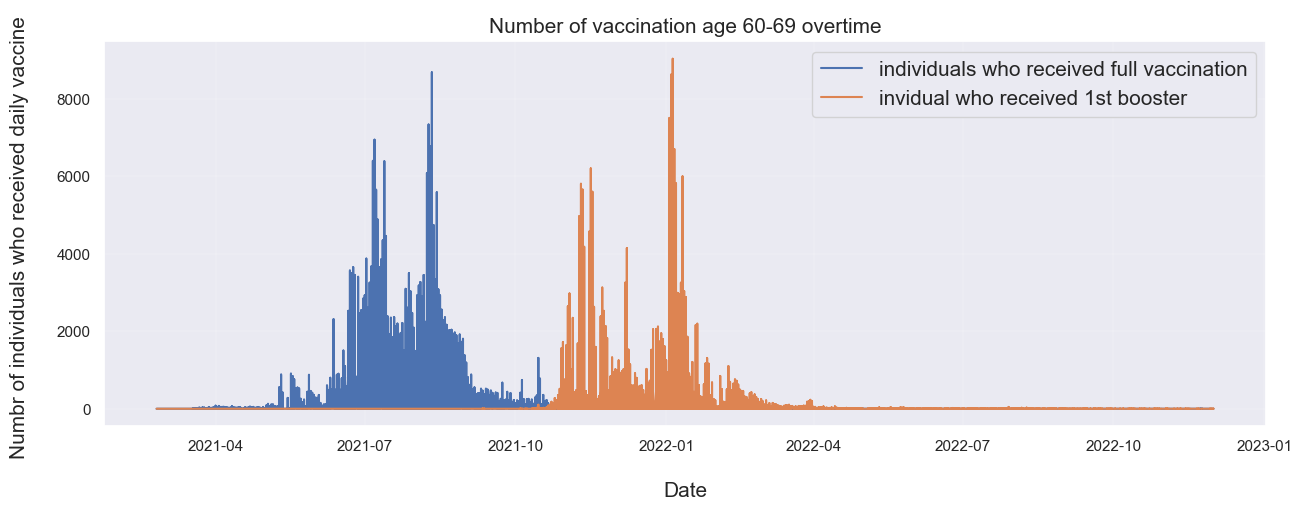

In [10]:
# Stage 3  : Using Data Visualizatin
#to check number of people vaccine age 60-69  compare full vaccination and booster

plt.figure(figsize=(15,5))
plt.title ("Number of vaccination age 60-69 overtime", fontsize=15)
plt.xlabel("\nDate",size=15)
plt.ylabel("Numbr of individuals who received daily vaccine \n",size=15)
plt.grid(linewidth =0.2)

plt.plot(df2.date, df2.full_60_69,label="individuals who received full vaccination")
plt.plot(df2.date, df2.booster_60_69, label ="invidual who received 1st booster")
plt.legend(fontsize="15")
plt.show()


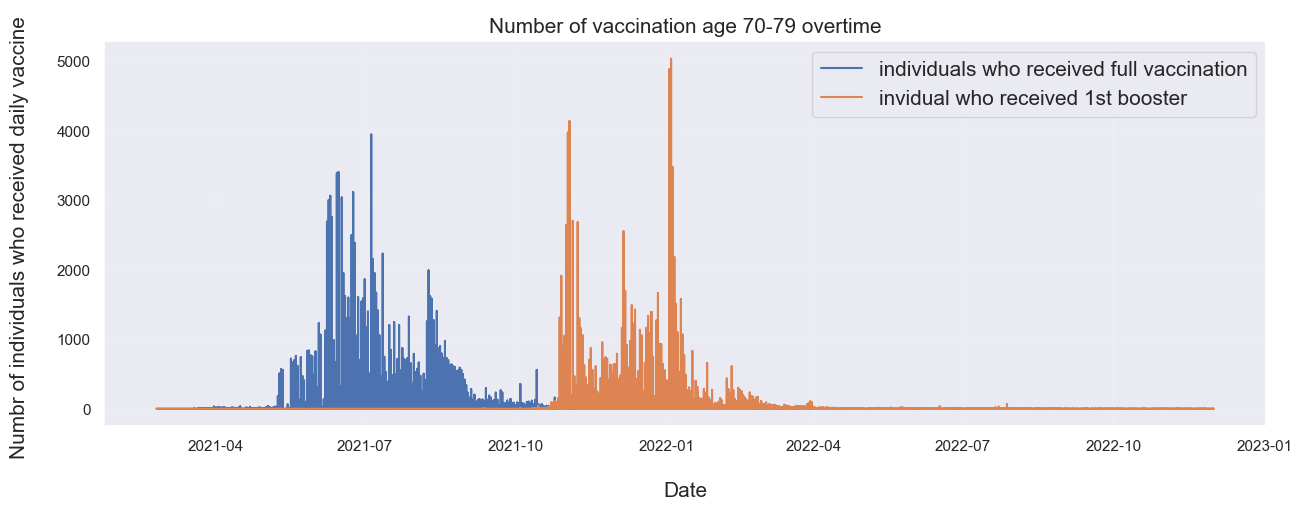

In [28]:
#to check number of people vaccine age 70-79 compare full vaccine and booster

plt.figure(figsize=(15,5))
plt.title ("Number of vaccination age 70-79 overtime", fontsize=15)
plt.xlabel("\nDate",size=15)
plt.ylabel("Numbr of individuals who received daily vaccine \n",size=15)
plt.grid(linewidth =0.2)

plt.plot(df2.date, df2.full_70_79,label="individuals who received full vaccination")
plt.plot(df2.date, df2.booster_70_79, label ="invidual who received 1st booster")
plt.legend(fontsize="15")
plt.show()

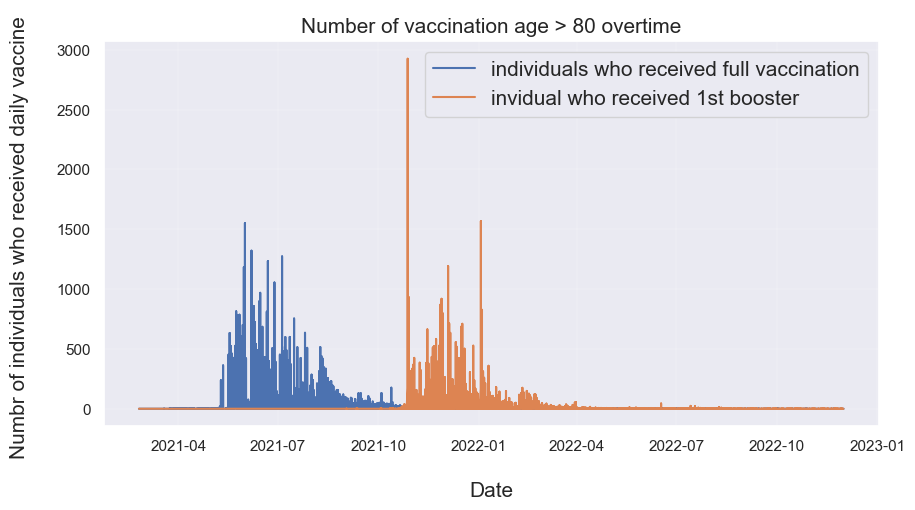

In [29]:
#to check number of people vaccine age >80 compare full vaccine and booster

plt.figure(figsize=(10,5))
plt.title ("Number of vaccination age > 80 overtime", fontsize=15)
plt.xlabel("\nDate",size=15)
plt.ylabel("Numbr of individuals who received daily vaccine \n",size=15)
plt.grid(linewidth =0.2)

plt.plot(df2.date, df2.full_80,label="individuals who received full vaccination")
plt.plot(df2.date, df2.booster_80, label ="invidual who received 1st booster")
plt.legend(fontsize="15")
plt.show()

Text(0, 0.5, 'Number of individuals who received vaccine \n')

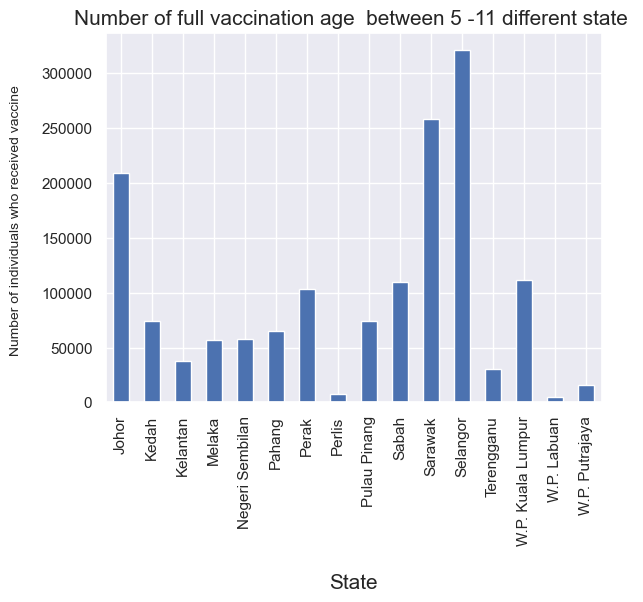

In [33]:
# plot bar chart for children age 5-11 received full vaccination compare to different state
df2.groupby(pd.Grouper(key="state")).full_5_11.sum().plot(kind='bar')
plt.title ("Number of full vaccination age  between 5 -11 different state ", fontsize=15)
plt.xlabel("\nState",size=15)
plt.ylabel("Number of individuals who received vaccine \n",size=10)

Text(0, 0.5, 'Number of individuals who received vaccine \n')

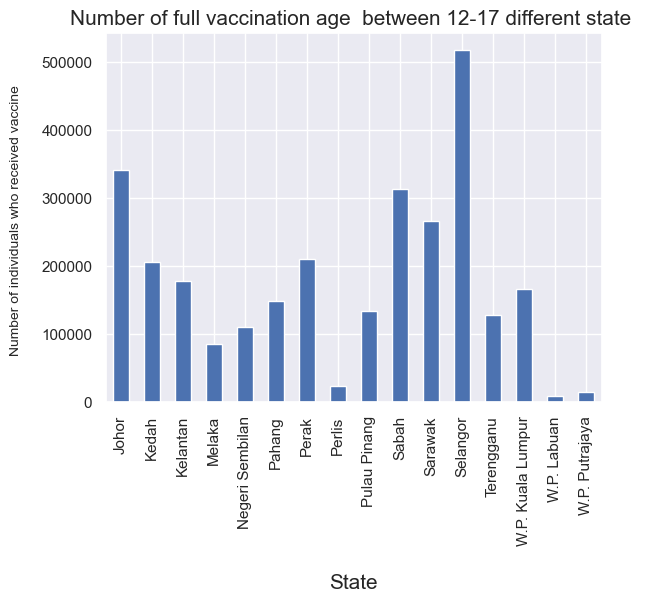

In [34]:
# plot bar chart for children age 12-11 received full vaccination compare to different state
df2.groupby(pd.Grouper(key="state")).full_12_17.sum().plot(kind='bar')
plt.title ("Number of full vaccination age  between 12-17 different state ", fontsize=15)
plt.xlabel("\nState",size=15)
plt.ylabel("Number of individuals who received vaccine \n",size=10)


In [9]:
# Stage 4 : Data visualization using multiple bar
df3=df2.groupby(pd.Grouper(key="state")).sum()

C:\Users\Irfan\AppData\Local\Temp\ipykernel_2956\238434907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df2.groupby(pd.Grouper(key="state")).sum()


In [10]:
# to dsiplay total vaccination across the state
df3

,full_5_11,booster_5_11,full_12_17,booster_12_17,full_60_69,booster_60_69,full_70_79,booster_70_79,full_80,booster_80
state,,,,,,,,,,
Johor,208926,130,341453,7475,267243,220117,123276,100745,42470,31297
Kedah,74318,32,206176,1706,154968,97561,69510,39588,22682,10703
Kelantan,37759,23,178025,830,105811,47653,49078,20132,12841,4215
Melaka,56914,23,85515,1572,69376,61727,33150,28631,11145,8899
Negeri Sembilan,57706,32,111054,1330,92850,76487,41687,33577,14273,10168
Pahang,65381,98,148580,2202,101918,69921,47172,31461,13348,7957
Perak,103392,124,210329,6238,210189,160161,108439,82751,37633,26581
Perlis,7565,5,24340,90,20213,11100,10099,5347,3382,1448
Pulau Pinang,74342,46,134262,2016,141970,121590,73005,61959,24564,19894


In [13]:
df3.index

Index(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
       'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor',
       'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya'],
      dtype='object', name='state')

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Johor to W.P. Putrajaya
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   full_5_11      16 non-null     int64
 1   booster_5_11   16 non-null     int64
 2   full_12_17     16 non-null     int64
 3   booster_12_17  16 non-null     int64
 4   full_60_69     16 non-null     int64
 5   booster_60_69  16 non-null     int64
 6   full_70_79     16 non-null     int64
 7   booster_70_79  16 non-null     int64
 8   full_80        16 non-null     int64
 9   booster_80     16 non-null     int64
dtypes: int64(10)
memory usage: 1.4+ KB


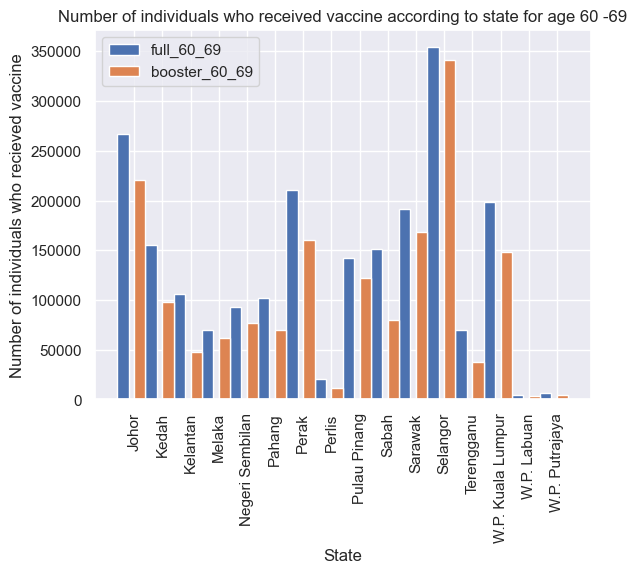

In [13]:
# Multiple bar comparing vaccine and booster across age 60-69
import numpy as np
import matplotlib.pyplot as plt

X = df3.index
Y = df3["full_60_69"]
Z = df3["booster_60_69"]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, Y,-0.4, label = 'full_60_69')
plt.bar(X_axis + 0.2, Z,0.4, label = 'booster_60_69')

plt.xticks(X_axis, X,rotation=90)
plt.xlabel("State")
plt.ylabel("Number of individuals who recieved vaccine")
plt.title("Number of individuals who received vaccine according to state for age 60 -69")
plt.legend()
plt.show()



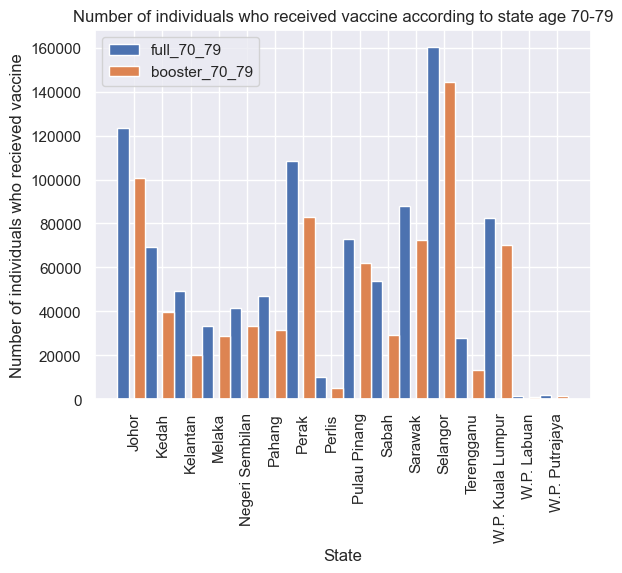

In [14]:
# Multiple bar comparing vaccine and booster across age  70-79
import numpy as np
import matplotlib.pyplot as plt

X = df3.index
Y = df3["full_70_79"]
Z = df3["booster_70_79"]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, Y,0.4, label = 'full_70_79')
plt.bar(X_axis + 0.2, Z,0.4, label = 'booster_70_79')

plt.xticks(X_axis, X,rotation=90)
plt.xlabel("State")
plt.ylabel("Number of individuals who recieved vaccine")
plt.title("Number of individuals who received vaccine according to state age 70-79")
plt.legend()
plt.show()

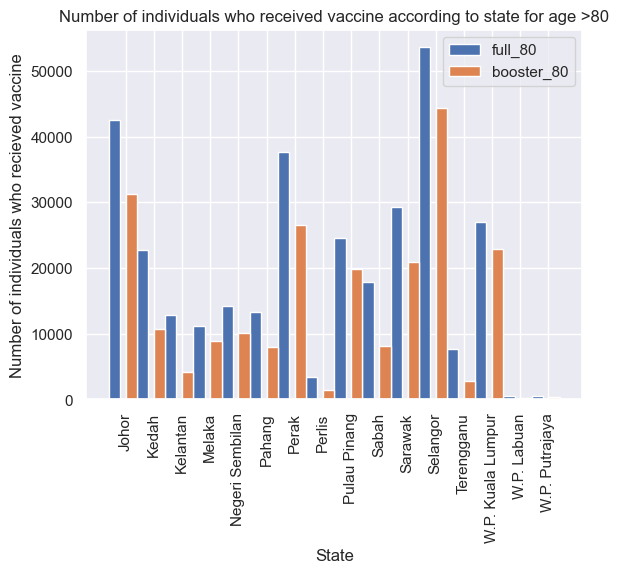

In [15]:
# Multiple bar comparing vaccine and bosster age > 80
import numpy as np
import matplotlib.pyplot as plt

X =df3.index
Y = df3["full_80"]
Z = df3["booster_80"]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.4, Y, 0.4, label = 'full_80')
plt.bar(X_axis + 0.2, Z, +0.4, label = 'booster_80')

plt.xticks(X_axis, X,rotation=90)
plt.xlabel("State")
plt.ylabel("Number of individuals who recieved vaccine")
plt.title("Number of individuals who received vaccine according to state for age >80")
plt.legend()
plt.show()

In [11]:
# stage 5 gto check for correlation
df3.corr(method="pearson")

,full_5_11,booster_5_11,full_12_17,booster_12_17,full_60_69,booster_60_69,full_70_79,booster_70_79,full_80,booster_80
full_5_11,1.000000,0.803833,0.895708,0.880414,0.896961,0.931491,0.879623,0.900249,0.880252,0.878345
booster_5_11,0.803833,1.000000,0.617676,0.528654,0.561974,0.575754,0.538229,0.542888,0.538051,0.512812
full_12_17,0.895708,0.617676,1.000000,0.881842,0.931348,0.893478,0.895882,0.850531,0.882861,0.820034
booster_12_17,0.880414,0.528654,0.881842,1.000000,0.944218,0.953048,0.935113,0.949478,0.942337,0.947735
full_60_69,0.896961,0.561974,0.931348,0.944218,1.000000,0.973054,0.990748,0.966684,0.985823,0.953440
booster_60_69,0.931491,0.575754,0.893478,0.953048,0.973054,1.000000,0.974624,0.992612,0.976131,0.983916
full_70_79,0.879623,0.538229,0.895882,0.935113,0.990748,0.974624,1.000000,0.979537,0.996993,0.968773
booster_70_79,0.900249,0.542888,0.850531,0.949478,0.966684,0.992612,0.979537,1.000000,0.984040,0.997292
full_80,0.880252,0.538051,0.882861,0.942337,0.985823,0.976131,0.996993,0.984040,1.000000,0.977182
booster_80,0.878345,0.512812,0.820034,0.947735,0.953440,0.983916,0.968773,0.997292,0.977182,1.000000


In [ ]:
df3.skew

In [ ]:
df3.kurt()